# CS412 - Machine Learning
## Homework 3


### Data preperation

In [1]:
import numpy as np
#from random import randint
from sklearn.tree import DecisionTreeClassifier
#from sklearn.datasets import load_iris
from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import random
from sklearn.metrics import accuracy_score
from sklearn import tree


mnist = fetch_mldata('MNIST original')


X = mnist.data

Y = mnist.target
X,Y = shuffle(X,Y)

splt = int(len(Y)*.8)

train_X = X[1:splt]
train_Y = Y[1:splt]

test_X = X[splt+1:]
test_Y = Y[splt+1:]



c:\program files\python37\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
c:\program files\python37\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


### Decision Tree

In [2]:
from sklearn.tree import DecisionTreeClassifier


splits = [0.001,0.005,0.01]
levels = [10,20,30]

max_acc = 0 #0.856918351310808
max_DT = 0
max_split = 0 # 0.001
max_level = 0 # 20

#print("started")
for split in splits:
    for level in levels:
        DT = DecisionTreeClassifier(min_samples_split=split,max_depth=level)
        DT.fit(train_X,train_Y)
        pred = DT.predict(test_X)
        acc = accuracy_score(test_Y,pred)
        if(acc>max_acc):
            max_acc = acc
            max_split = split
            max_level = level
            max_DT = DT
        #print(pred)
        #print(acc)
        #print(split,level)
        
        
print(" best parameters split: {0}, level: {1}, accuracy: {2}".format(max_split,max_level,max_acc))        
print(" Number of generated nodes: {0}".format(max_DT.tree_.node_count))



 best parameters split: 0.001, level: 20, accuracy: 0.8560611472248018
 Number of generated nodes: 2141


#### root pixel

In [3]:
root_pixel = max_DT.tree_.__getstate__()["nodes"][0][2]
print("root pixel : {0} \nrow,column : {1},{2}".format(root_pixel,root_pixel//28,root_pixel%28))





root pixel : 409 
row,column : 14,17


## Aggregate Features

Shape of original data (70000, 784)
Shape of aggregated data (70000, 49)


<Figure size 432x288 with 0 Axes>

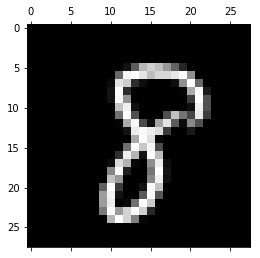

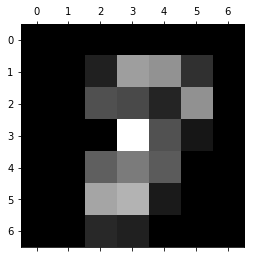

plotted number is 8.0


In [4]:
aggregate_X = np.zeros((X.shape[0],7*7))
                      
print("Shape of original data {0}".format(X.shape))
print("Shape of aggregated data {0}".format(aggregate_X.shape))

for sample in range(0,X.shape[0]):
    for x in range(0,7):
        for y in range(0,7):
            dummySum = 0
            #print("x: {0} y: {1}\n".format(x,y))
            for i in range(0,4):
                for j in range(0,4):
                    #print((4*y+j)*28+ 4*x+i)
                    #print(X[sample][(4*y+j)*28+ 4*x+i])
                    dummySum+=X[sample][(4*y+j)*28+ 4*x+i]
                #print("----")
            #print("dummySum {0}".format(dummySum))
            aggregate_X[sample][x+y*7] = dummySum/16
                
        

plt.gray() 
plt.matshow(X[0].reshape((28,28)))
plt.show()

plt.matshow(aggregate_X[0].reshape((7,7)))
plt.show()

print("plotted number is {0}".format(Y[0]))


In [5]:
train_aggregate_X = aggregate_X[1:splt]
test_aggregate_X = aggregate_X[splt+1:]

splits = [0.001,0.005,0.01]
levels = [10,20,30]

max_acc = 0 
max_DT = 0
max_split = 0 
max_level = 0 

#print("started")
for split in splits:
    for level in levels:
        DT = DecisionTreeClassifier(min_samples_split=split,max_depth=level)
        DT.fit(train_aggregate_X,train_Y)
        pred = DT.predict(test_aggregate_X)
        acc = accuracy_score(test_Y,pred)
        if(acc>max_acc):
            max_acc = acc
            max_split = split
            max_level = level
            max_DT = DT
        #print(pred)
        #print(acc)
        #print(split,level)
        
        
print("for aggregated data best parameters split: {0}, level: {1}, accuracy: {2}".format(max_split,max_level,max_acc))        
print("for aggregated data Number of generated nodes: {0}".format(max_DT.tree_.node_count))



started
for aggregated data best parameters split: 0.001, level: 20, accuracy: 0.8524894635331095
for aggregated data Number of generated nodes: 2165


# Preprocessing

In [6]:
from sklearn.decomposition import PCA

pca = PCA(.80)
pca.fit(X)



print("before PCA, the shape is = {0}".format(train_X.shape))
pp_train_X = pca.transform(train_X)
pp_test_X = pca.transform(test_X)
print("after PCA, the shape is = {0}".format(pp_train_X.shape))

before PCA, the shape is = (55999, 784)
after PCA, the shape is = (55999, 43)


# K-NN

In [7]:
from sklearn import neighbors


for neighbor in [2,3,4,5]:
    clf = neighbors.KNeighborsClassifier(neighbor)
    clf.fit(pp_train_X, train_Y)
    pred = clf.predict(pp_test_X)
    acc = accuracy_score(test_Y,pred)
    print("accuracy: {0} for neighbor = {1}".format(acc,neighbor))

accuracy: 0.9734266733338096 for neighbor = 2
accuracy: 0.978284163154511 for neighbor = 3
accuracy: 0.9770697906993356 for neighbor = 4
accuracy: 0.9762125866133295 for neighbor = 5


# Gaussian Naive Bayesian

In [8]:
from sklearn.naive_bayes import GaussianNB
pred = GaussianNB().fit(train_X, train_Y).predict(test_X)
acc = accuracy_score(test_Y,pred)
print("accuracy for Naive Bayesian : {0}".format(acc))

accuracy for Naive Bayesian : 0.5588256304021716


# mean and variance

In [9]:
threes = []
zeros = []
#print(Y)
for i in range(0,len(Y)):
    if(Y[i]==0):
        #print("0 is found {0} {1}".format(i,Y[i]))
        zeros.append(X[i])
    elif(Y[i]==3):
        #print("3 is found {0} {1}".format(i,Y[i]))
        threes.append(X[i])

        
        
numbers = [0,3]
elements = [zeros,threes]
for i in range(0,len(elements)):
    elem = elements[i]
    totalMean = 0
    totalVar = 0
    for e in elem:
        totalMean+=e[14*28+14]

    #print(len(elem))
    totalMean=totalMean/len(elem)    
    
    print("Mean for pixel 14,14 of number {0} : {1}".format(numbers[i],totalMean))  
    
    for e in elem:
        totalVar+=(e[14*28+14]-totalMean)**2
    
    totalVar = totalVar/len(elem)
    print("Variance for pixel 14,14 of number {0} : {1}\n".format(numbers[i],totalVar))  



Mean for pixel 14,14 of number 0 : 4.5846733304360425
Variance for pixel 14,14 of number 0 : 828.8666171865319

Mean for pixel 14,14 of number 3 : 159.26130794006443
Variance for pixel 14,14 of number 3 : 11181.352807643434



# Multivariate Gaussian

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

pred = LinearDiscriminantAnalysis(solver="svd",store_covariance=True).fit(train_X, train_Y).predict(test_X)
acc = accuracy_score(test_Y,pred)
print("accuracy for LDA {0}".format(acc))

pred = QuadraticDiscriminantAnalysis(store_covariance=True).fit(train_X, train_Y).predict(test_X)
acc = accuracy_score(test_Y,pred)
print("accuracy for QDA {0}".format(acc))

c:\program files\python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


accuracy for LDA 0.8697049789270662


c:\program files\python37\lib\site-packages\sklearn\discriminant_analysis.py:686: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


accuracy for QDA 0.5418244160297164
